# Pre-training Elapsed Time and Speedup Comparison

In [1]:
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
def load_file(pkl_file_path):
    with open(pkl_file_path, 'rb') as file:
        loaded_data = pickle.load(file)
        return loaded_data

## Serial

In [3]:
serial_trainer = load_file('res/serial_trainer.pkl')
print(serial_trainer.total_time)

2153.4934573173523


## Multi-process

In [4]:
process_2__trainer = load_file('res/process_2__trainer.pkl')
process_4__trainer = load_file('res/process_4__trainer.pkl')
process_8__trainer = load_file('res/process_8__trainer.pkl')

In [5]:
process_list = [1, 2, 4, 8]
trainer_list = [serial_trainer, process_2__trainer, process_4__trainer, process_8__trainer] 
pro_time_list = [t.total_time for t in trainer_list]
pro_speedup_list = [pro_time_list[0] / t for t in pro_time_list]

In [6]:
def plot_time_and_speedup_process(process_list, time_list, speedup_list) -> None:
    color = 'tab:purple'
    plt.figure(figsize=(12, 5.5))
    plt.title("Time and Speedup Using Multi-process")
    plt.subplot(1, 2, 1)
    plt.plot(process_list, time_list, marker="o", color=color, label="Elapsed Time")
    plt.title("Elapsed Time")
    plt.xlabel("Number of Processes")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.xticks(process_list, [int(n) for n in process_list])
    plt.xlim(0.5, 8.5)
    plt.ylim(900, 2300)

    plt.subplot(1, 2, 2)
    plt.plot(process_list, speedup_list, marker="o", color=color, label="Speedup")
    plt.title("Speedup")
    plt.xlabel("Number of Processes")
    plt.ylabel("Speedup")
    plt.grid(True)
    plt.xticks(process_list, [int(n) for n in process_list])
    plt.xlim(0.5, 8.5)
    plt.ylim(0.9, 2.1)

    plt.suptitle("Multi-process Elapsed Time and Speedup", fontsize=14)
    plt.tight_layout()
    plt.gcf().set_dpi(600)
    plt.savefig(f"res/process_time_speedup.png", dpi=600)
    plt.show()

In [7]:
def multi_process_comp():
    print(f"Time: {pro_time_list}")
    print(f"Speedup: {pro_speedup_list}")
    plot_time_and_speedup_process(process_list, pro_time_list, pro_speedup_list)

Time: [2153.4934573173523, 1169.8230679035187, 1114.2051734924316, 1113.5023527145386]
Speedup: [1.0, 1.8408710824763477, 1.9327620339145555, 1.933981955285037]


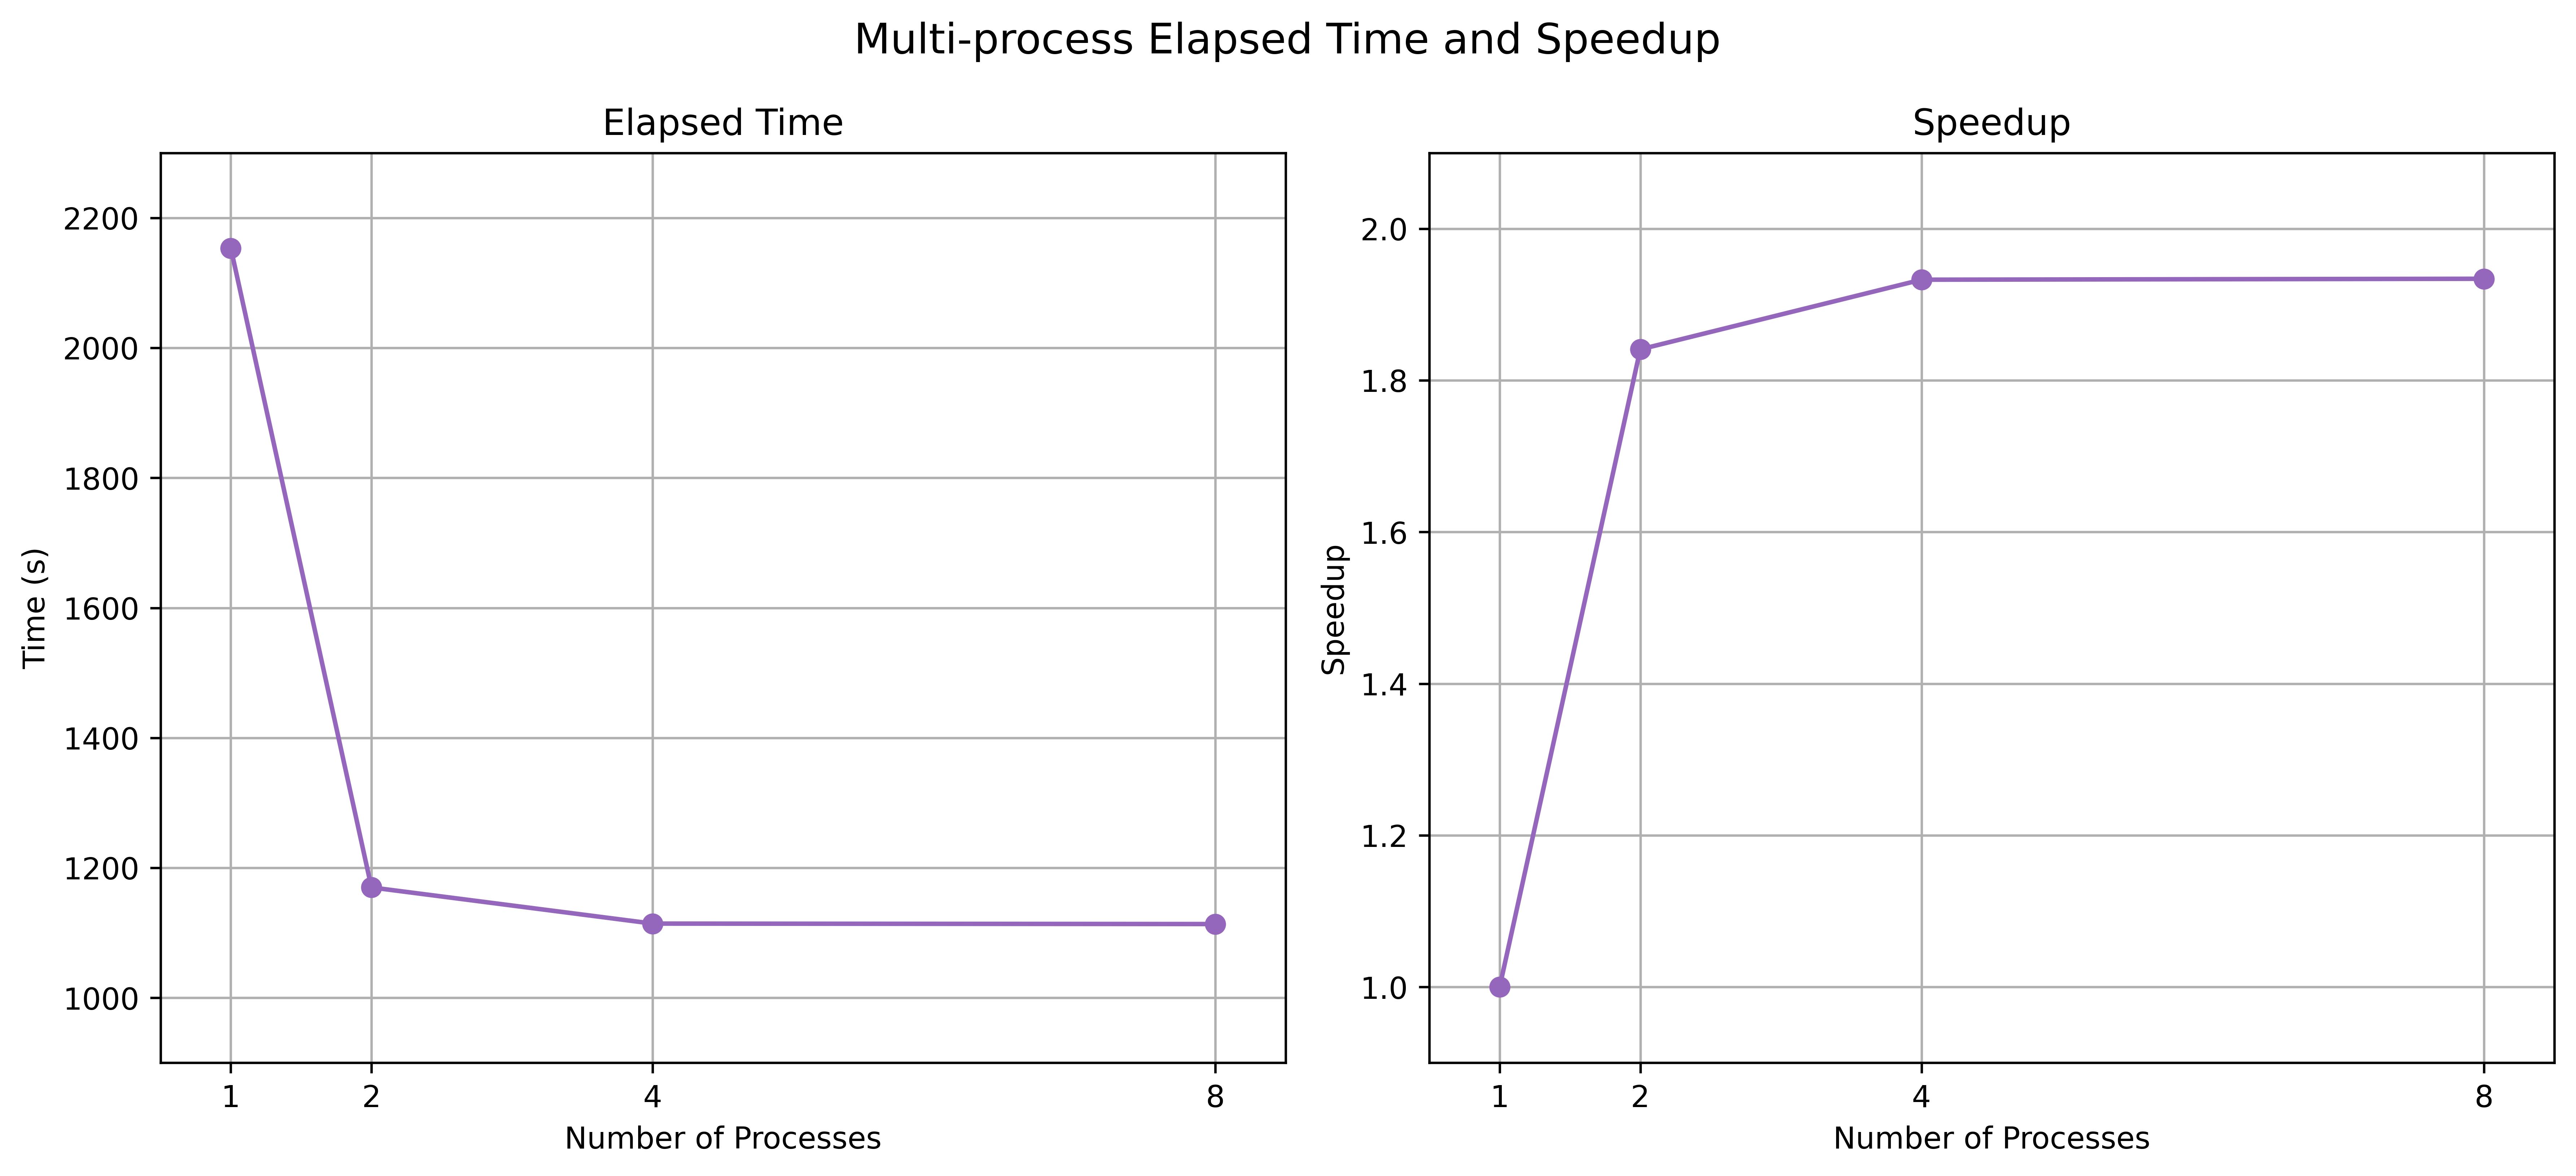

In [8]:
multi_process_comp()

## DataParallel

In [9]:
# The eplased time is obtained using DataParallel on Kaggle 2 T4 GPUs
dp_2__time = 1630.4430594444275

In [10]:
gpu_list = [1, 2]
dp_time_list = [serial_trainer.total_time, dp_2__time]
dp_speedup_list = [dp_time_list[0] / t for t in dp_time_list]

In [11]:
def plot_time_and_speedup_dp(gpu_list, time_list, speedup_list) -> None:
    plt.figure(figsize=(12, 5.5))

    plt.subplot(1, 2, 1)
    plt.plot(gpu_list, time_list, marker="x", label="Elapsed Time")
    plt.title("Elapsed Time")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.xticks(gpu_list, [int(n) for n in gpu_list])
    plt.xlim(0.5, 8.5)
    plt.ylim(900, 2300)

    plt.subplot(1, 2, 2)
    plt.plot(gpu_list, speedup_list, marker="x", label="Speedup")
    plt.title("Speedup")
    plt.xlabel("Number of GPUs")
    plt.ylabel("Speedup")
    plt.grid(True)
    plt.xticks(gpu_list, [int(n) for n in gpu_list])
    plt.xlim(0.5, 8.5)
    plt.ylim(0.9, 2.1)

    plt.suptitle("DataParallel Elapsed Time and Speedup", fontsize=14)
    plt.tight_layout()
    plt.gcf().set_dpi(600)
    plt.savefig(f"res/dp_time_speedup.png", dpi=600)
    plt.show()

In [12]:
def dp_comp():
    print(f"Time: {dp_time_list}")
    print(f"Speedup: {dp_speedup_list}")
    plot_time_and_speedup_dp(gpu_list, dp_time_list, dp_speedup_list)

Time: [2153.4934573173523, 1630.4430594444275]
Speedup: [1.0, 1.3208026154873227]


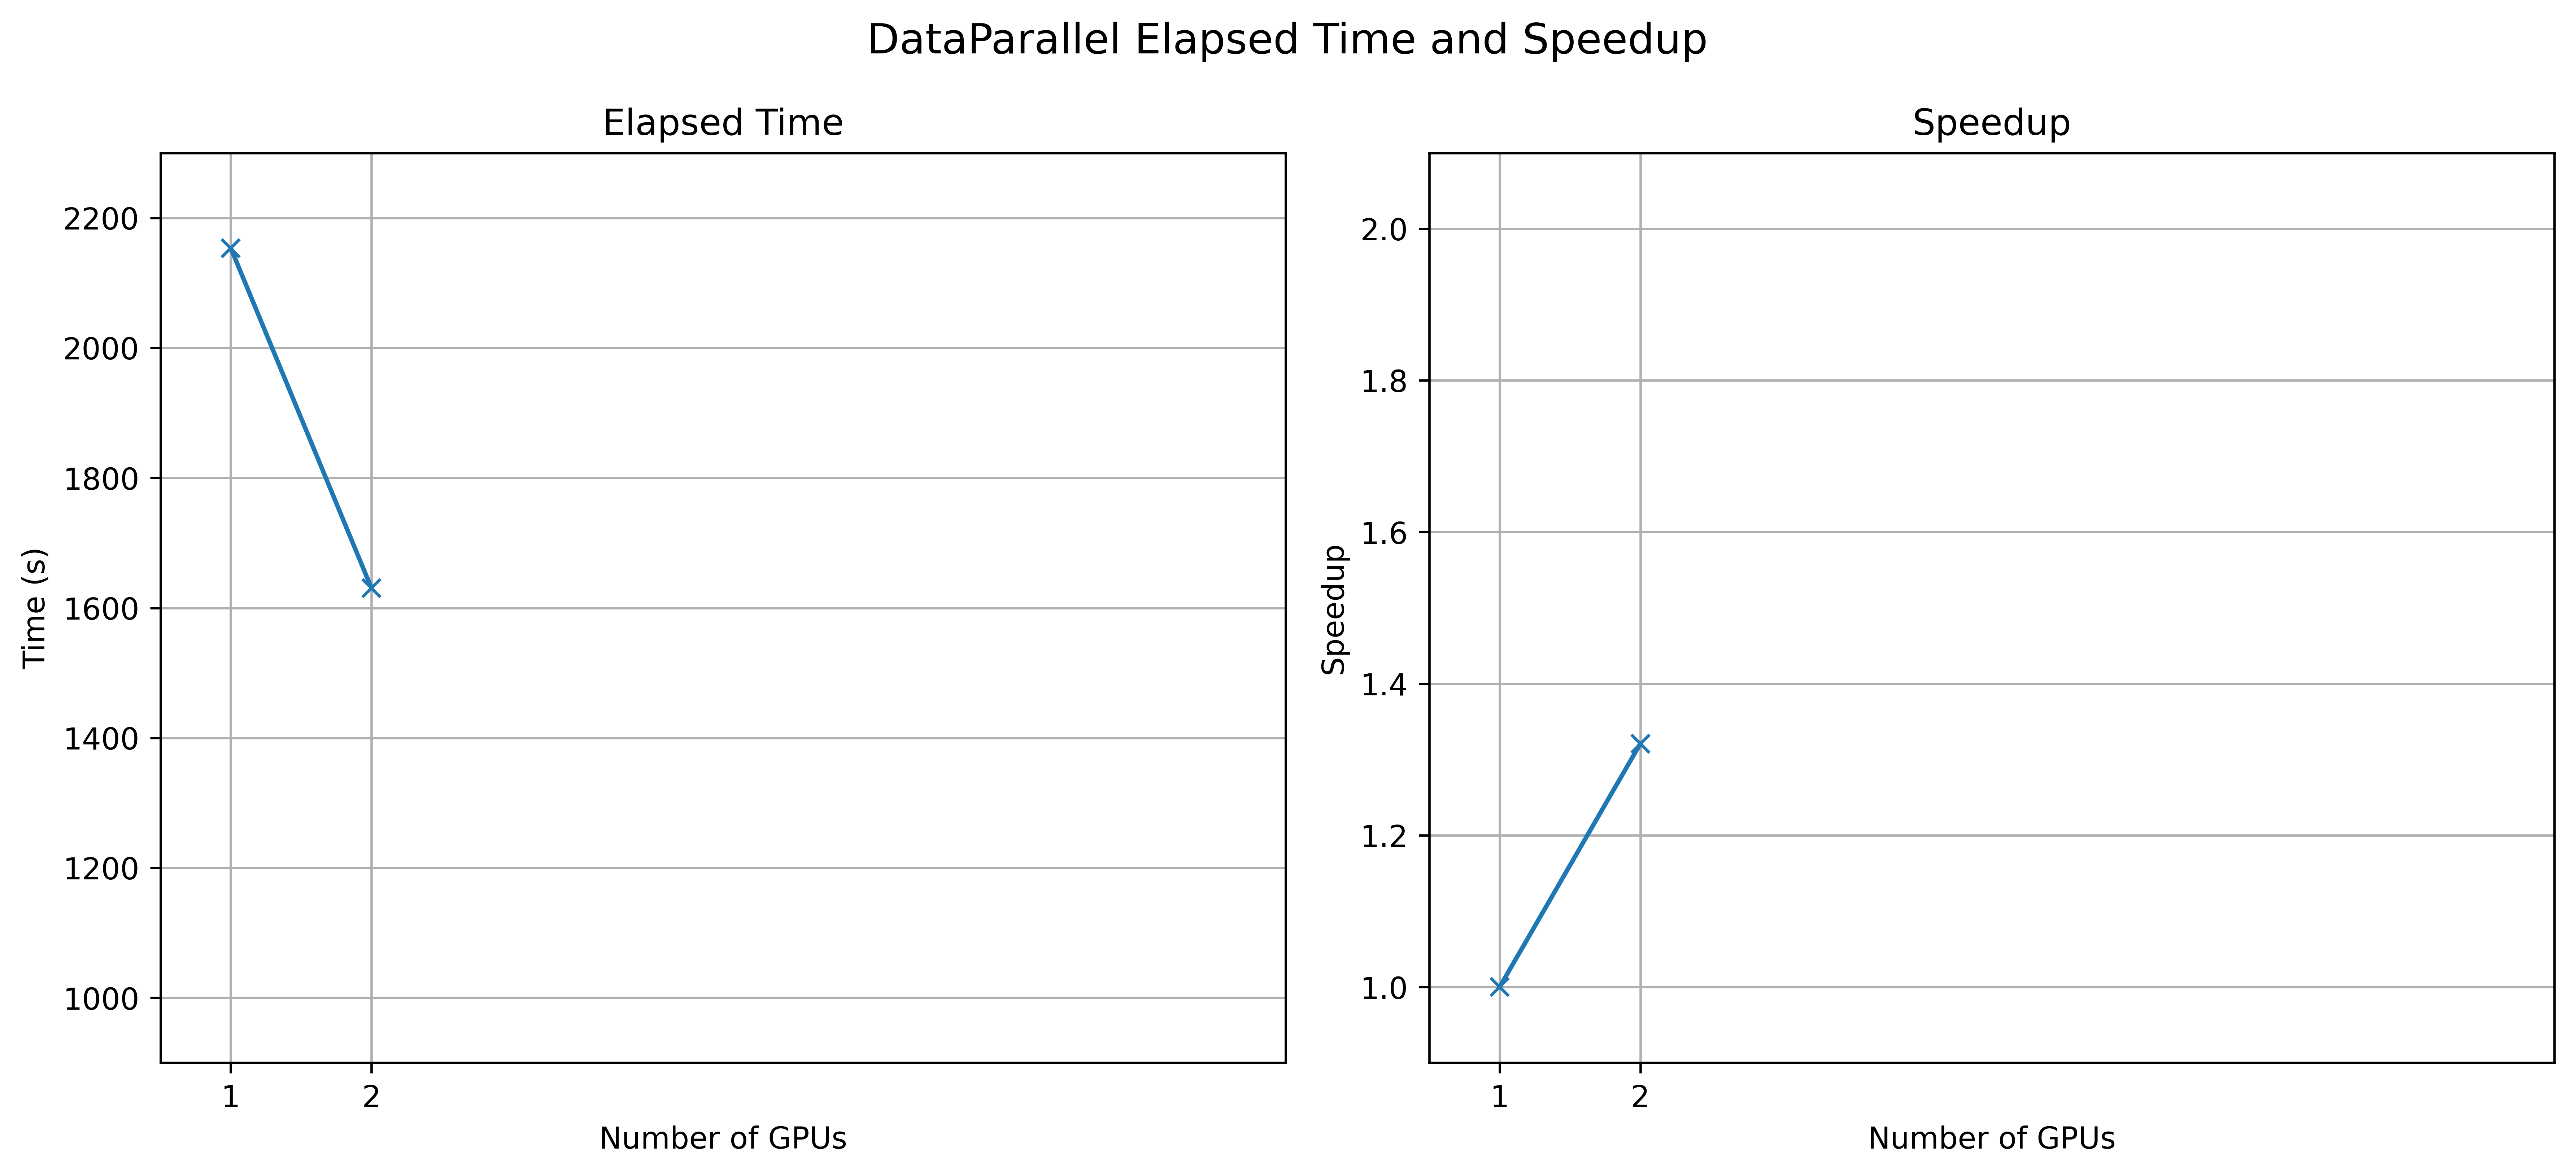

In [13]:
dp_comp()

## Summary

In [14]:
def plot_time_and_speedup_combined(process_list, gpu_list, pro_time_list, pro_speedup_list, dp_time_list, dp_speedup_list):
    # Plotting Time
    fig, ax1 = plt.subplots(figsize=(6, 5.5))

    color = 'tab:purple'
    ax1.set_xlabel('Number of Processes')
    ax1.set_ylabel('Elapsed Time (s)')
    ax1.plot(process_list, pro_time_list, color=color, marker='o', label='Multi-process')
    ax1.tick_params(axis='y')
    ax1.set_xlim([0.5, 8.5])
    ax1.set_ylim([900, 2300])
    ax1.set_xticks([1, 2, 4, 8])
    ax1.grid(True)
    ax1.legend(bbox_to_anchor=(1, 0.95))

    ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_xlabel('Number of GPUs')
    ax2.plot(gpu_list, dp_time_list, color=color, marker='x', label='DataParallel')
    ax2.tick_params(axis='x')
    ax2.set_xlim([0.5, 8.5])
    ax2.set_xticks([1, 2])
    ax2.legend(bbox_to_anchor=(1, 0.85))
    plt.title('Elapsed Time', fontsize=14, y=1.12)

    plt.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.gcf().set_dpi(300)
    plt.savefig(f"res/train_comp_time.png", dpi=300)

    # Plotting Speedup
    fig, ax3 = plt.subplots(figsize=(6, 5.5))

    color = 'tab:purple'
    ax3.set_xlabel('Number of Processes')
    ax3.set_ylabel('Speedup')
    ax3.plot(process_list, pro_speedup_list, color=color, marker='o', label='Multi-process')
    ax3.tick_params(axis='y')
    ax3.set_xlim([0.5, 8.5])
    ax3.set_ylim([0.9, 2.1])
    ax3.set_xticks([1, 2, 4, 8])
    ax3.grid(True)
    ax3.legend(loc='lower right')
    ax3.legend(bbox_to_anchor=(1, 0.25))

    ax4 = ax3.twiny()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax4.set_xlabel('Number of GPUs')
    ax4.plot(gpu_list, dp_speedup_list, color=color, marker='x', label='DataParallel')
    ax4.tick_params(axis='x')
    ax4.set_xlim([0.5, 8.5])
    ax4.set_xticks([1, 2])
    ax4.legend(loc='lower right')
    ax4.legend(bbox_to_anchor=(1, 0.15))
    plt.title('Speedup', fontsize=14, y=1.12)

    plt.tight_layout()
    plt.gcf().set_dpi(300)
    plt.savefig(f"res/train_comp_speedup.png", dpi=300)

    plt.show()

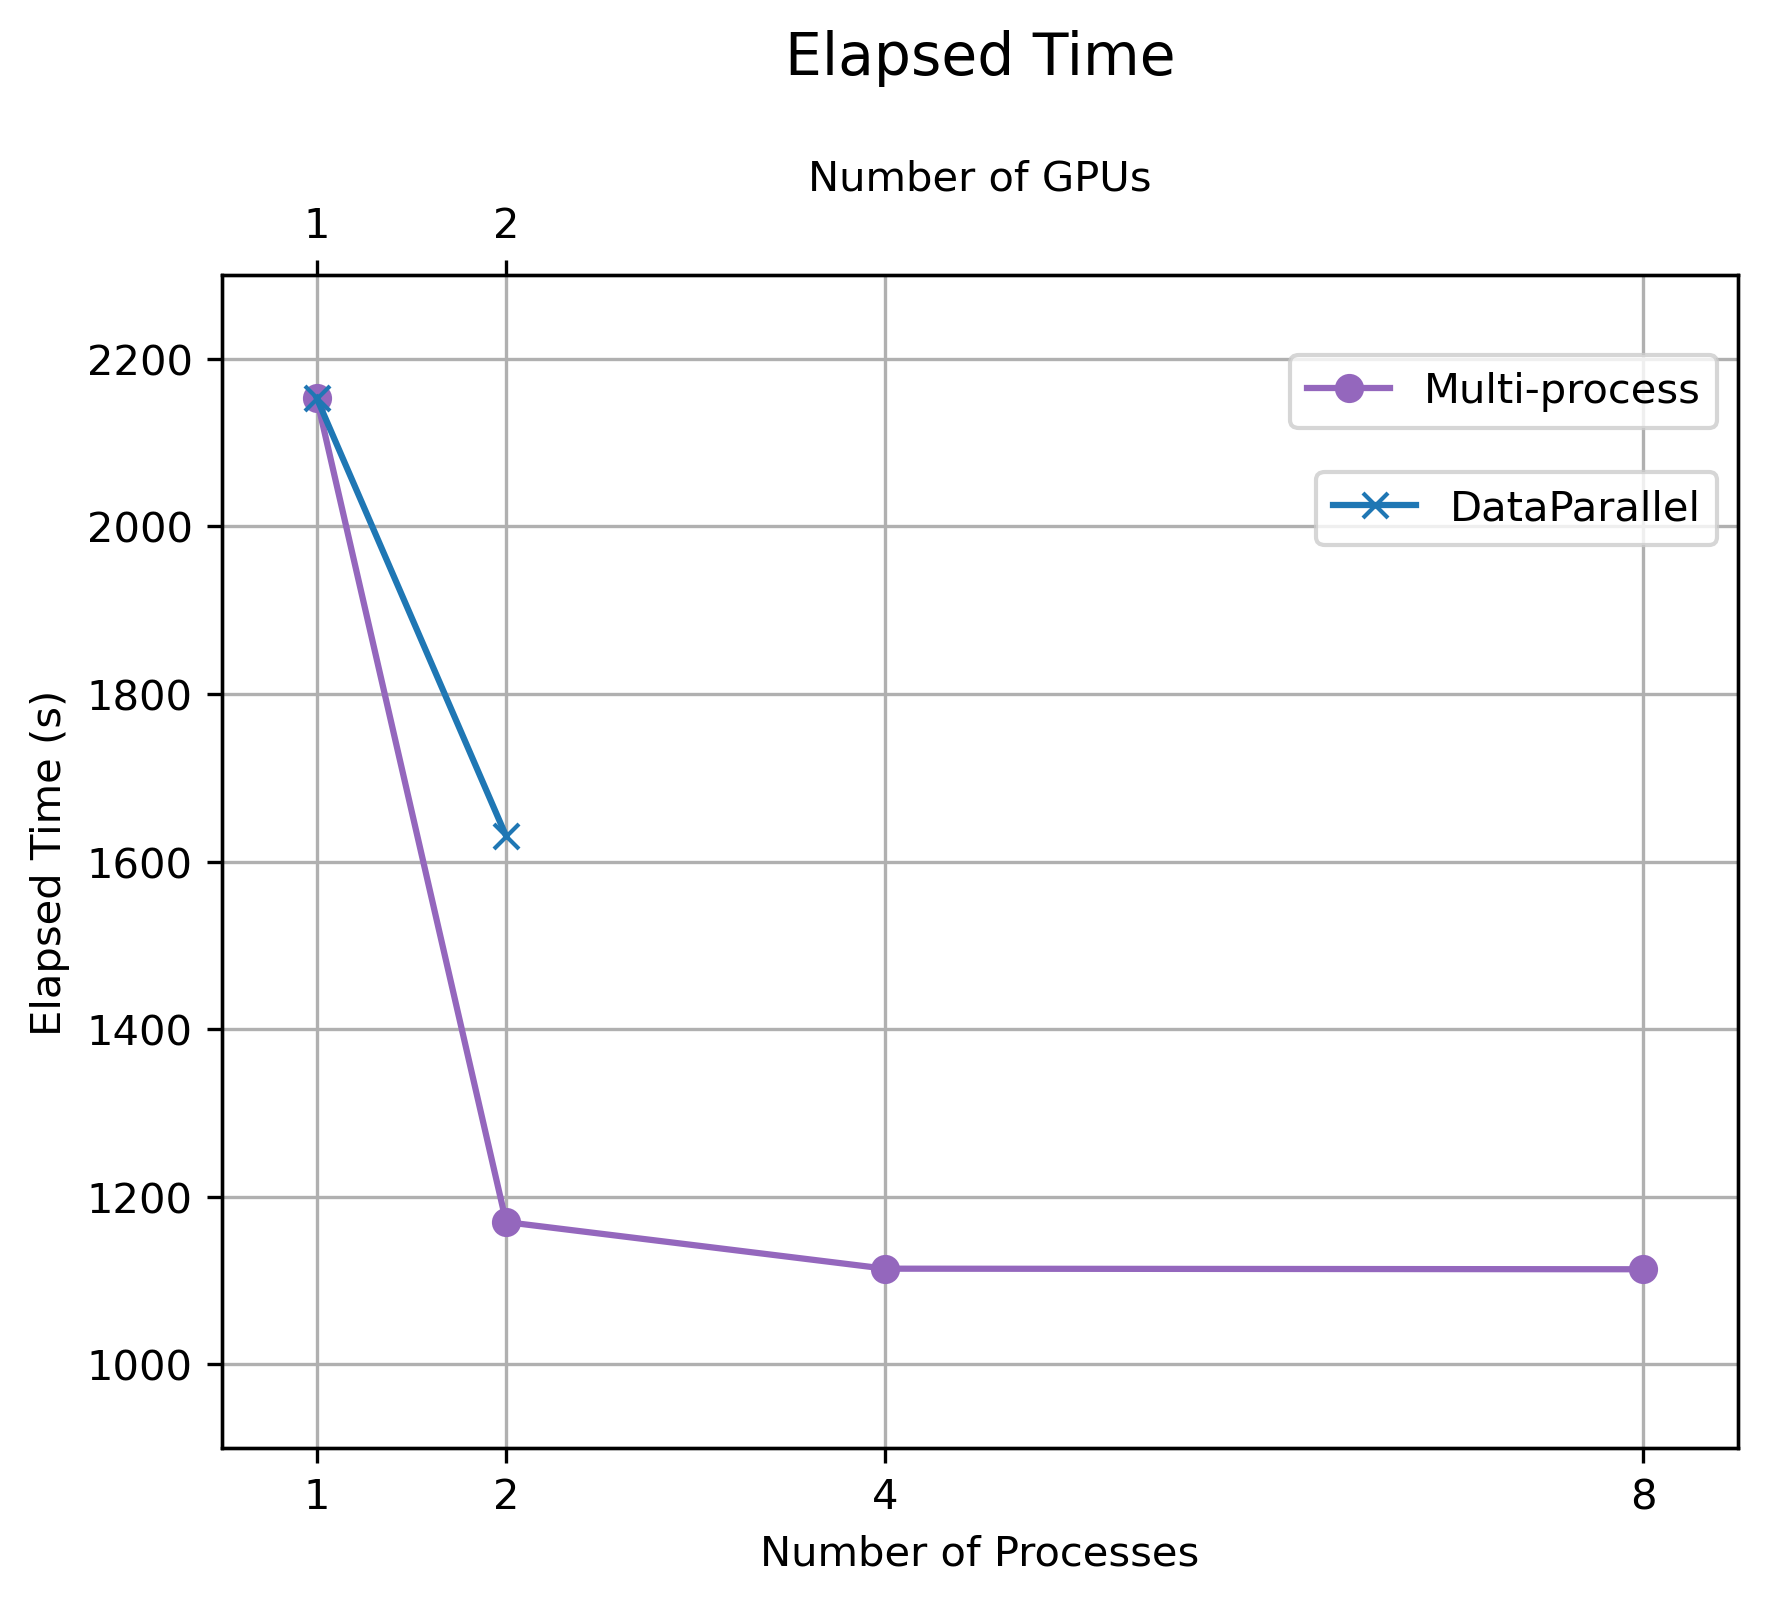

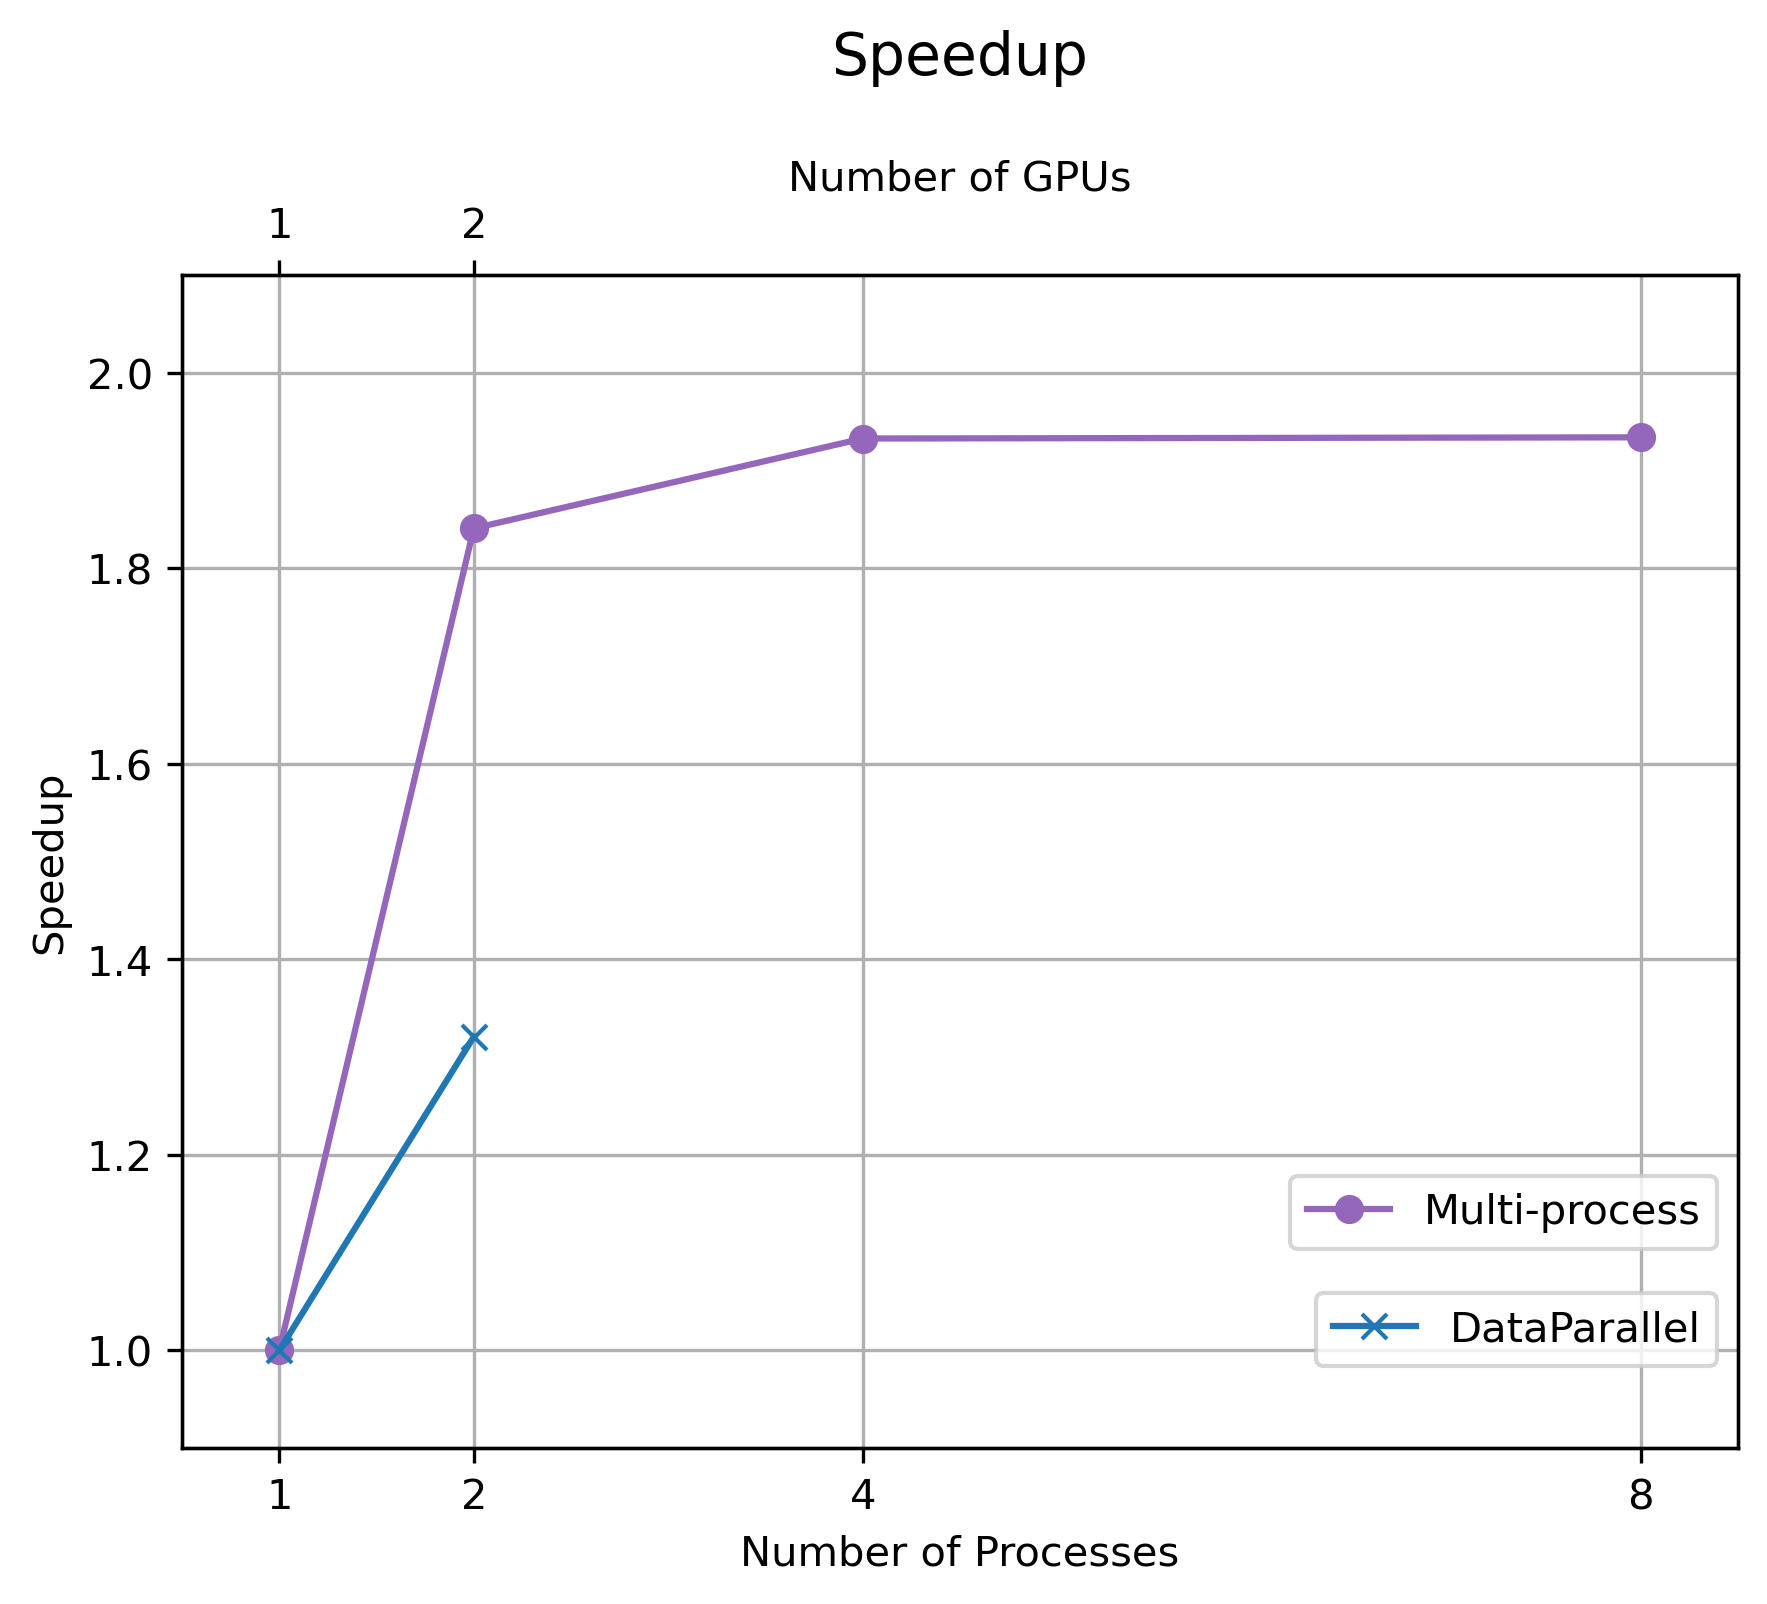

In [15]:
plot_time_and_speedup_combined(process_list, gpu_list, pro_time_list, pro_speedup_list, dp_time_list, dp_speedup_list)